# Stock price forecasting

# Modeling Random Forests and LSTM neural network

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import joblib

## Random Forest

In [1]:
from sklearn.ensemble import RandomForestRegressor

In [4]:
X_train = pd.read_csv('X_train_KO.csv', parse_dates=True, index_col=0)
y_train = pd.read_csv('y_train_KO.csv', parse_dates=True, index_col=0)

X_test = pd.read_csv('X_test_KO.csv', parse_dates=True, index_col=0)
y_test = pd.read_csv('y_test_KO.csv', parse_dates=True, index_col=0)

In [5]:
# Initialize the random forest regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_model.predict(X_test)

/tmp/ipykernel_161181/2240749210.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


In [6]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 6.293098118850899


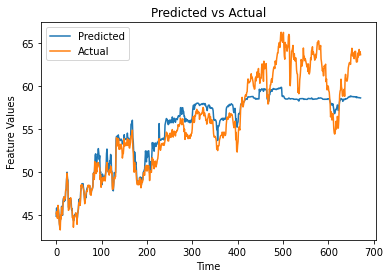

In [9]:
# Create a range of indices for the x-axis
x = range(len(y_pred))

# Plot the predicted values (y_pred) and the true values (y_test)
plt.plot(x, y_pred, label='Predicted')
plt.plot(x, y_test, label='Actual')

# Set y-axis label
plt.ylabel('Feature Values')

# Set x-axis label
plt.xlabel('Time')

# Set plot title
plt.title('Predicted vs Actual')

# Add legend
plt.legend()

# Show the plot
plt.show()

## Long-Short-Term-Memory neural network

In [28]:

import tensorflow as tf
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from pandas.tseries.offsets import DateOffset

In [14]:
X_train_scaled = pd.read_csv('X_train_KO_scaled.csv', parse_dates=True, index_col=0)

X_test_scaled = pd.read_csv('X_test_KO_scaled.csv', parse_dates=True, index_col=0)


In [17]:
X_train_scaled

,Open,High,Low,Adj Close,Volume,Reported EPS,Price Change,RSI,K,EMA12,EMA26,MACD Line,Signal Line,MACD Histogram,ROC,OBV,P/E,Day,Month,Year
Date,,,,,,,,,,,,,,,,,,,,
1996-05-06,-0.648920,-0.654097,-0.638926,-0.445364,-0.610511,-0.88,0.669759,0.077578,0.217365,-0.625830,-0.623091,-0.011322,0.004406,-0.046611,-0.119645,-0.143860,1.335518,6,5,1996
1996-05-07,-0.631559,-0.642507,-0.613860,-0.441540,-0.671145,-0.88,0.283956,0.183083,0.463161,-0.624166,-0.622081,0.010803,0.008833,0.011019,0.235502,-0.139655,1.357337,7,5,1996
1996-05-08,-0.623843,-0.625121,-0.619644,-0.431023,-0.464970,-0.88,0.824081,0.588727,0.770407,-0.619509,-0.619576,0.083545,0.028113,0.186536,0.388377,-0.134452,1.417340,8,5,1996
1996-05-09,-0.602623,-0.609666,-0.586865,-0.431023,-0.915235,-0.88,-0.024687,0.816113,0.382307,-0.615569,-0.617256,0.138390,0.055404,0.281193,0.388377,-0.134452,1.417340,9,5,1996
1996-05-10,-0.600694,-0.607735,-0.579152,-0.422419,-0.899363,-0.88,0.669759,0.707594,0.770407,-0.609576,-0.613824,0.225000,0.095975,0.438131,0.780395,-0.131351,1.466433,10,5,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-27,0.959876,1.000193,0.962863,1.492904,0.946187,0.60,3.308652,-0.088394,-0.223788,0.974753,1.015706,-1.106348,-1.617311,1.244787,-1.191359,1.243422,0.047806,27,4,2020
2020-04-28,1.077160,1.063246,1.015927,1.490718,0.696080,0.60,-0.123446,-0.070372,-0.237268,0.979672,1.015872,-0.946280,-1.495612,1.396820,-0.544510,1.232602,0.045889,28,4,2020
2020-04-29,1.038272,1.054592,1.035055,1.511487,0.505893,0.60,0.913580,-0.216069,-0.109203,0.987426,1.017760,-0.748575,-1.355479,1.614673,-0.069671,1.242502,0.064098,29,4,2020


In [15]:
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [18]:
X_train_scaled_values = X_train_scaled.values
X_test_scaled_values = X_test_scaled.values

In [21]:
# Create datasets for LSTM
look_back = 60
X_train, Y_train = create_dataset(X_train_scaled_values, look_back)
X_test, Y_test = create_dataset(X_test_scaled_values, look_back)

# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [22]:

# Initialize a sequential model
model = Sequential()

# Add the first LSTM layer with 50 units, input shape, and return sequences
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
# Add dropout to prevent overfitting
model.add(Dropout(0.2))

# Add a second LSTM layer with 50 units and return sequences
model.add(LSTM(units=50, return_sequences=True))
# Add dropout to prevent overfitting
model.add(Dropout(0.2))

# Add a third LSTM layer with 50 units
model.add(LSTM(units=50))
# Add dropout to prevent overfitting
model.add(Dropout(0.2))

# Add a dense output layer with one unit
model.add(Dense(units=1))


2023-07-25 15:04:05.558256: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-25 15:04:05.564807: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-25 15:04:05.568986: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [23]:
model.summary()
model.compile(
    optimizer='adam', 
    loss='mean_squared_error'
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 5

In [24]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpointer = ModelCheckpoint(
    filepath = 'weights_best.hdf5', 
    verbose = 2, 
    save_best_only = True
)

model.fit(
    X_train, 
    Y_train, 
    epochs=25, 
    batch_size = 32,
    callbacks = [checkpointer]
)

Epoch 1/25


2023-07-25 15:04:32.417022: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-25 15:04:32.421457: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-25 15:04:32.423874: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

187/187 [==============================] - 25s 93ms/step - loss: 0.0161
Epoch 2/25
187/187 [==============================] - 17s 92ms/step - loss: 0.0072
Epoch 3/25
187/187 [==============================] - 17s 93ms/step - loss: 0.0063
Epoch 4/25
187/187 [==============================] - 17s 93ms/step - loss: 0.0060
Epoch 5/25
187/187 [==============================] - 17s 91ms/step - loss: 0.0055
Epoch 6/25
187/187 [==============================] - 16s 87ms/step - loss: 0.0054
Epoch 7/25
187/187 [==============================] - 16s 87ms/step - loss: 0.0048
Epoch 8/25
187/187 [==============================] - 16s 87ms/step - loss: 0.0047
Epoch 9/25
187/187 [==============================] - 16s 88ms/step - loss: 0.0045
Epoch 10/25
187/187 [==============================] - 16s 88ms/step - loss: 0.0045
Epoch 11/25
187/187 [==============================] - 16s 87ms/step - loss: 0.0045
Epoch 12/25
187/187 [==============================] - 16s 87ms/step - loss: 0.0046
Epoch 13/25


In [26]:
test_predict = model.predict(X_test)

2023-07-25 15:15:18.502802: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-25 15:15:18.505434: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-25 15:15:18.507497: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

20/20 [==============================] - 2s 35ms/step


In [34]:
# Load the scaler object from the file
scaler = joblib.load('robust_scaler.pkl')

In [35]:
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

In [37]:
df_KO = pd.read_csv('KO.csv', parse_dates=True, index_col=0)

ValueError: x and y must have same first dimension, but have shapes (685,) and (611, 1)

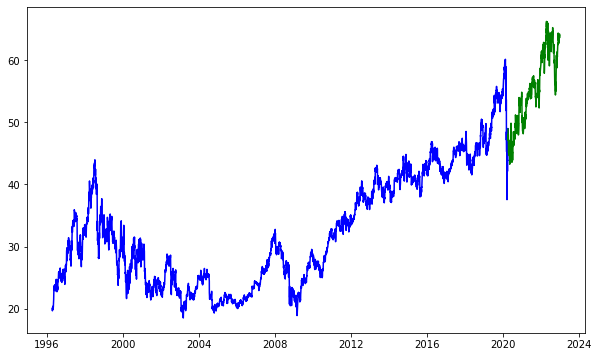

In [41]:
#plt.figure(figsize=(10,6))
#plt.plot(df_KO.index[:len(X_train)+look_back], df_KO['Close'][:len(X_train)+look_back], color='blue', label='Training data')
#plt.plot(df_KO.index[len(X_train)+look_back:-1], df_KO['Close'][len(X_train)+look_back:-1], color='green', label='Actual Stock Price')
#plt.plot(df_KO.index[len(X_train)+look_back:-1], test_predict, color='red', label='Prediction')
#plt.legend()
#plt.show()

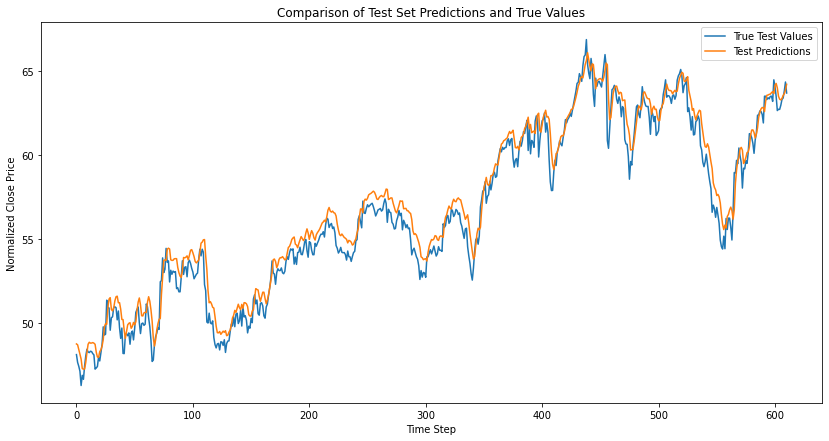

In [42]:
# plot test predictions and actual values
plt.figure(figsize=(14,7))
plt.plot(Y_test[0], label='True Test Values')
plt.plot(test_predict, label='Test Predictions')
plt.title('Comparison of Test Set Predictions and True Values')
plt.xlabel('Time Step')
plt.ylabel('Normalized Close Price')
plt.legend()
plt.show()